In [81]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df=pd.DataFrame(boston["data"],
              columns=boston["feature_names"])
df["ans"] = boston["target"]
df.to_csv("boston.csv",encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0



CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [82]:
from sklearn.model_selection import train_test_split
train_test_split([1,4,2,3],
                 [5,8,9,10],
                 [20,100,30,40],
                 test_size=0.25)

[[2, 3, 1], [4], [9, 10, 5], [8], [30, 40, 20], [100]]

In [0]:
from sklearn.model_selection import train_test_split
#[90% data , 10% data, 90% target, 10% target]
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1)

In [111]:
from sklearn.tree import DecisionTreeRegressor
# 避免過擬合 max_depth=4 4層
reg = DecisionTreeRegressor(max_depth=6,random_state=0)
# 訓練
reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

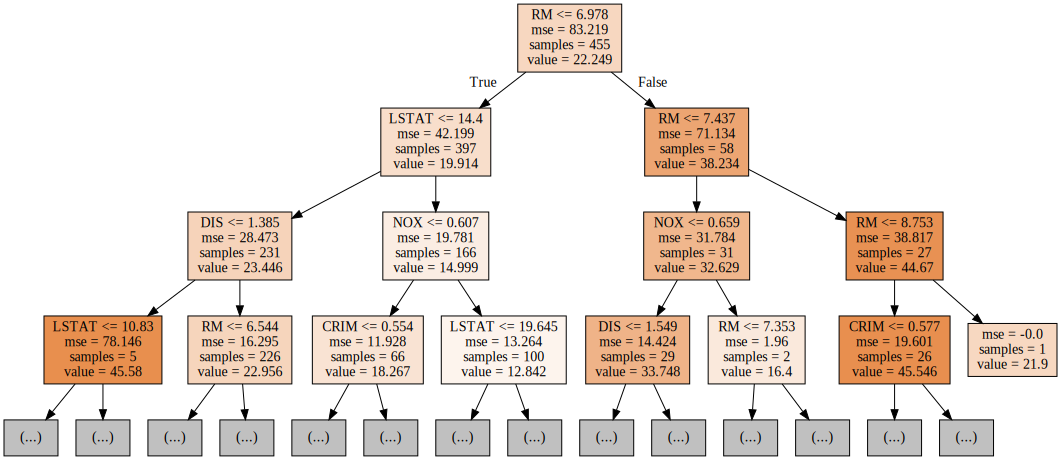

In [107]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg,
                    feature_names=boston["feature_names"],
                    filled=True,
                    max_depth=3)
graphviz.Source(g)

In [112]:
from sklearn.metrics import r2_score
# 預測 
pre= reg.predict(x_test)
print("prinet",pre)
print("r2_score",r2_score(y_test,pre))

prinet [16.69090909 30.54285714 38.35       33.24166667 16.1        30.18333333
 26.53636364  9.20555556 16.1        14.81       26.53636364 26.53636364
 34.41428571 22.49438202 22.49438202 33.24166667 26.53636364 45.48125
 22.49438202 20.24634146 16.69090909 22.49438202 20.24634146 16.69090909
 20.24634146 22.49438202 20.24634146 20.24634146 26.53636364 22.49438202
 22.49438202 14.81       22.49438202 22.49438202 45.48125    38.35
 22.49438202 30.54285714 20.24634146 30.18333333 33.24166667 22.49438202
 45.48125    20.24634146  9.20555556 26.53636364 34.41428571 20.24634146
 22.49438202  9.20555556 26.53636364]
r2_score 0.8599791792641257
